In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris["data"][:,2:]
y = iris["target"]

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
tree_clf = DecisionTreeClassifier(max_depth = 2)

In [6]:
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
from sklearn.tree import export_graphviz

In [12]:
export_graphviz(tree_clf,out_file="iris_tree.dot",feature_names=iris.feature_names[2:],class_names=iris.target_names,rounded=True,filled=True)

/home/shruti/ml/env/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


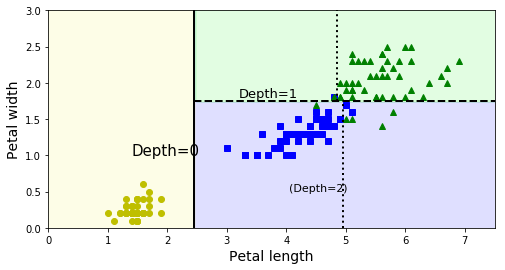

In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.savefig("decision_tree_decision_boundaries_plot")
plt.show()


In [21]:
tree_clf.predict_proba([[5 , 1.5]])

array([[ 0.        ,  0.90740741,  0.09259259]])

In [22]:
tree_clf.predict([[5 , 1.5]])

array([1])

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
X1 = np.random.rand(100,1)

In [26]:
y1 = 4*(X1-0.5)**2

In [27]:
y1 = y1 + np.random.randn(100)

In [31]:
tree_reg = DecisionTreeRegressor(min_samples_leaf = 10)

In [32]:
tree_reg.fit(X1,y1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [77]:
from sklearn.datasets import make_moons

In [78]:
X , y = make_moons(n_samples = 10000, noise =0.4)

In [79]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size =0.2)

In [80]:
from sklearn.model_selection import GridSearchCV
tree_clf = DecisionTreeClassifier()
param_grid = {'max_leaf_nodes':[10,20,50,70,100],'max_depth':[4,5,6,7]}

In [81]:
grid_search = GridSearchCV(tree_clf, param_grid, cv = 3, scoring ='accuracy')

In [82]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_leaf_nodes': [10, 20, 50, 70, 100], 'max_depth': [4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [83]:
grid_search.best_estimator_


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
final_model = grid_search.best_estimator_

In [85]:
final_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
y_pred = final_model.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(y_test,y_pred)

0.87

In [89]:
from sklearn.model_selection import ShuffleSplit

In [91]:
split = ShuffleSplit(n_splits = 1000,test_size=0.0,train_size = 0.01,random_state = 42)

In [100]:
from sklearn.base import clone
tree_clf = []
for train_index,test_index in split.split(X_train):
    train_set = X_train[train_index]
    test_set = y_train[train_index]
    tree_clff = clone(grid_search.best_estimator_)
    tree_clff.fit(train_set,test_set)
    tree_clf.append(tree_clff)

In [101]:
y_pred = []

In [102]:
for i in range(1000):
    y_get = tree_clf[i].predict(X_test)
    y_pred.append(y_get)

In [103]:
from scipy.stats import mode

In [111]:
y_prediction,votes = mode(y_pred,axis = 0)
y_prediction = y_prediction.reshape(-1)

In [112]:
accuracy_score(y_test,y_prediction)

0.87649999999999995